# LOGISTIC REGRESSION FROM SCRATCH IMPLEMENTATION

## 1. IMPORTING LIBRARIES
WE WILL USE ONLY NUMPY, PANDAS, AND MATPLOTLIB/SEABORN. <br>NO SKLEARN ALLOWED.

In [2]:
# IMPORT NUMERICAL COMPUTATION LIBRARY
import numpy as np

# IMPORT DATA HANDLING LIBRARY
import pandas as pd

# IMPORT VISUALIZATION LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

## VISUALIZATION STYLE

In [3]:
# SETTING UP THE VISUALIZATION STYLE GLOBALLY TO MATCH YOUR REQUIRED FORMAT
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

## LOADING DATA
READING THE DATA FROM CSV FILES.

In [4]:
# LOADING DATA
# IF HEADERS EXIST, REMOVE 'header=None'.

# LOAD X DATA FROM CSV FILE
X_data = pd.read_csv('DATA/logisticX.csv', header=None).values

# LOAD Y DATA FROM CSV FILE
y_data = pd.read_csv('DATA/logisticY.csv', header=None).values

In [5]:
# FLATTENING Y IF NEEDED TO MAKE IT A 1D ARRAY FOR EASIER CALCULATIONS
# RESHAPE Y INTO COLUMN VECTOR
y_data = y_data.reshape(-1, 1)

# CHECKING SHAPE
print(f"X SHAPE --> {X_data.shape}")
print(f"Y SHAPE --> {y_data.shape}")

X SHAPE --> (100, 2)
Y SHAPE --> (100, 1)


## PREPROCESSING DATA
WE WILL NORMALIZE THE DATA AND ADD AN INTERCEPT TERM (BIAS) TO X.

In [6]:
# NORMALIZATION (MIN-MAX SCALING)
# THIS IS CRUCIAL FOR GRADIENT DESCENT CONVERGENCE
# MATH: X_norm = (X - min) / (max - min)

X_min = np.min(X_data, axis = 0)
X_max = np.max(X_data, axis = 0)
X_norm = (X_data - X_min) / (X_max - X_min)

# 🔍 NORMALIZATION STRATEGY: MIN-MAX VS. Z-SCORE

IN OUR **[LINEAR REGRESSION](https://github.com/DaRkSouL36/LinearRegression)** PROJECT, WE UTILIZED **Z-SCORE NORMALIZATION (STANDARDIZATION)**. HOWEVER, FOR **[LOGISTIC REGRESSION](https://github.com/DaRkSouL36/LogisticRegression)**, WE HAVE OPTED FOR **MIN-MAX NORMALIZATION**.


HERE IS THE MATHEMATICAL AND LOGICAL REASONING BEHIND THIS CHOICE.

---

## 1. THE MATHEMATICAL FORMULAS

### **OPTION A: Z-SCORE (STANDARDIZATION)**
THIS CENTERS THE DATA AROUND 0 WITH A STANDARD DEVIATION OF 1. IT IS IDEAL WHEN DATA FOLLOWS A GAUSSIAN (BELL CURVE) DISTRIBUTION.
$$
X_{norm} = \frac{X - \mu}{\sigma}
$$
> *RESULTING RANGE:* ROUGHLY $[-3, +3]$ (UNBOUNDED).

### **OPTION B: MIN-MAX (NORMALIZATION)**
THIS RESCALES THE FEATURES TO A FIXED RANGE OF $[0, 1]$. BEST WHEN DATA DOES NOT FOLLOW A NORMAL DISTRIBUTION OR HAS A BOUNDED RANGE.
$$
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$
> *RESULTING RANGE:* STRICTLY $[0, 1]$.

---

## 2. WHY MIN-MAX FOR LOGISTIC REGRESSION?

### **REASON 1: THE VANISHING GRADIENT PROBLEM**
LOGISTIC REGRESSION USES THE **SIGMOID ACTIVATION FUNCTION**:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

THE DERIVATIVE (GRADIENT) OF THE SIGMOID FUNCTION IS `$g(z)(1 - g(z))$`.

* WHEN $Z$ IS VERY LARGE (POSITIVE) OR VERY SMALL (NEGATIVE), THE GRADIENT APPROACHES **ZERO**.
* IF THE INPUT FEATURES $X$ HAVE LARGE MAGNITUDES (WHICH CAN HAPPEN WITH Z-SCORE IF THERE ARE OUTLIERS), THE DOT PRODUCT `$Z = \theta^T X$` BECOMES LARGE.
* THIS PUSHES OUR PREDICTIONS INTO THE "FLAT" REGIONS OF THE SIGMOID CURVE, CAUSING **VANISHING GRADIENTS**, WHERE THE MODEL STOPS LEARNING.
* **MIN-MAX** GUARANTEES INPUTS ARE STRICTLY BOUNDED BETWEEN 0 AND 1, KEEPING $Z$ SMALLER INITIALLY AND ENSURING STABLE GRADIENTS.

> **LINEAR REGRESSION** PREDICTS VALUES FROM $-\infty$ TO $+\infty$. Z-SCORE (WHICH PRODUCES NEGATIVE AND POSITIVE VALUES) ALIGNS NATURALLY WITH THIS UNBOUNDED OUTPUT.

> **LOGISTIC REGRESSION** DEALS WITH PROBABILITIES $[0, 1]$. USING **MIN-MAX SCALING** TRANSFORMS YOUR INPUT FEATURES $X$ INTO THE SAME $[0, 1]$ RANGE AS YOUR OUTPUT PROBABILITIES. THIS SYMMETRY OFTEN HELPS IN INTERPRETABILITY AND NUMERICAL STABILITY WHEN WEIGHTS ARE INITIALIZED SMALL.

### **REASON 2: NUMERICAL STABILITY OF `exp()`**
THE CODE RELIES ON `np.exp(-z)`.

* IF $Z$ BECOMES A LARGE NEGATIVE NUMBER, $e^{-Z}$ EXPLODES TOWARDS INFINITY, CAUSING A FLOATING-POINT OVERFLOW (`NaN` ERRORS).
* BY RESTRICTING $X$ TO $[0, 1]$, WE REDUCE THE RISK OF $Z$ GROWING UNCONTROLLABLY LARGE DURING THE EARLY STAGES OF TRAINING.

### **REASON 3: NO ASSUMPTION OF NORMALITY**
* **Z-SCORE** ASSUMES THE DATA IS NORMALLY DISTRIBUTED (GAUSSIAN). IF THE DATASET (`LogisticX.CSV`) IS NOT BELL-SHAPED (E.G., UNIFORM DISTRIBUTION OR SKEWED), Z-SCORE MIGHT DISTORT THE RELATIVE DISTANCES BETWEEN POINTS.
* **MIN-MAX** MAKES **NO ASSUMPTIONS** ABOUT THE DISTRIBUTION OF YOUR DATA. IT SIMPLY SHRINKS THE RANGE.

### **REASON 4: GRADIENT DESCENT EFFICIENCY**
FOR GRADIENT DESCENT TO CONVERGE QUICKLY, CONTOURS OF THE COST FUNCTION SHOULD BE CIRCULAR, NOT ELLIPTICAL.
* BOTH METHODS ACHIEVE THIS BY PUTTING FEATURES ON A SIMILAR SCALE.
* HOWEVER, IF IMAGE DATA OR PIXEL INTENSITIES WERE USED (COMMON IN LOGISTIC REGRESSION), THEY ARE STRICTLY POSITIVE $[0, 255]$. MIN-MAX PRESERVES THIS **POSITIVITY**, WHEREAS Z-SCORE INTRODUCES NEGATIVE VALUES, WHICH MIGHT BE PHYSICS-DEFYING IN SOME CONTEXTS.
  
---

## 3. WHEN TO SWITCH BACK TO Z-SCORE?

WE SHOULD USE **Z-SCORE** INSTEAD IF:
1.  **OUTLIERS EXIST:** MIN-MAX IS VERY SENSITIVE TO OUTLIERS. ONE HUGE VALUE CAN SQUASH ALL OTHER DATA TO $0$. Z-SCORE IS MORE ROBUST.
2.  **INITIALIZATION AT ZERO:** IF INPUTS ARE CENTERED AT $0$ (Z-SCORE), THE INITIAL DOT PRODUCT `$\theta^T X$` STARTS CLOSE TO $0$, WHERE THE **SIGMOID GRADIENT IS STEEPEST** ($0.25$). THIS CAN SOMETIMES SPEED UP EARLY TRAINING COMPARED TO STRICTLY POSITIVE INPUTS (MIN-MAX).

---

> **VERDICT FOR THIS PROJECT**
>
> SINCE WE ARE IMPLEMENTING FROM SCRATCH AND OUR DATASET IS SIMPLE WITHOUT EXTREME OUTLIERS, **MIN-MAX** OFFERS A BOUNDED, NUMERICALLY SAFE RANGE $[0, 1]$ THAT MIRRORS THE PROBABILISTIC NATURE OF LOGISTIC REGRESSION.

### **SUMMARY TABLE**

| FEATURE | MIN-MAX SCALING (USED HERE) | Z-SCORE SCALING (USED PREVIOUSLY) |
| :--- | :--- | :--- |
| **FORMULA** | $\frac{X - MIN}{MAX - MIN}$ | $\frac{X - \mu}{\sigma}$ |
| **RANGE** | $[0, 1]$ (BOUNDED) | UNBOUNDED (CENTRED AT 0) |
| **OUTLIERS** | SENSITIVE TO OUTLIERS | ROBUST TO OUTLIERS |
| **BEST USE** | IMAGE DATA, NEURAL NETWORKS, LOGISTIC REGRESSION | LINEAR REGRESSION, SVM, PCA |

> **NOTE:** WHILE Z-SCORE IS ALSO A VALID TECHNIQUE FOR LOGISTIC REGRESSION, MIN-MAX PROVIDES A "SAFER" STARTING GROUND FOR BUILDING ALGORITHMS **FROM SCRATCH** BY MINIMIZING NUMERICAL OVERFLOWS AND SATURATION RISKS.

In [7]:
# ADDING INTERCEPT TERM (COLUMN OF ONES) TO X
# MATH: X = [1, x1, x2, ...]

m = len(y_data)
X_ready = np.hstack((np.ones((m , 1)), X_norm))

print(f"PROCESSED X SHAPE: {X_ready.shape}")

PROCESSED X SHAPE: (100, 3)


## WHAT’S GOING ON MATHEMATICALLY?

LOGISTIC REGRESSION MODELS THE PROBABILITY AS:

$$\hat{y} = \sigma(z) = \sigma(\theta^T X)$$

---

### 1. WITHOUT THE INTERCEPT (NO COLUMN OF ONES)

IF WE DO NOT ADD THE BIAS TERM (THE COLUMN OF ONES), OUR MODEL RELIES SOLELY ON THE INPUT FEATURES:

$$z = \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$$

> **THE PROBLEM:** THIS FORCES THE DECISION BOUNDARY ($z=0$) TO PASS DIRECTLY THROUGH THE ORIGIN. THE MODEL ASSUMES THAT IF ALL INPUTS $x$ ARE `0`, THE OUTPUT PROBABILITY MUST BE `0.5`.

---

### 2. WITH THE INTERCEPT (ADDING A COLUMN OF ONES)

BY ADDING A COLUMN OF ONES TO THE INPUT MATRIX:

$$X = [1, x_1, x_2, \dots]$$

YOUR MODEL EQUATION BECOMES:

$$z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$$



### WHY IS THIS CRITICAL?

* **$\theta_0$ ACTS AS THE INTERCEPT (OR BIAS).**
* **SHIFTING THE CURVE:** IT SHIFTS THE SIGMOID FUNCTION LEFT OR RIGHT, INDEPENDENTLY OF THE FEATURE VALUES.
* **FLEXIBILITY:** IT ALLOWS THE DECISION BOUNDARY TO BE LOCATED ANYWHERE IN THE FEATURE SPACE, ENABLING THE MODEL TO FIT DATA THAT IS NOT CENTERED AT THE ORIGIN.

## VISUALIZE ORIGINAL DATA

In [8]:
# FLATTEN Y INTO 1D ARRAY FOR INDEXING
y_flat = y_data.flatten()

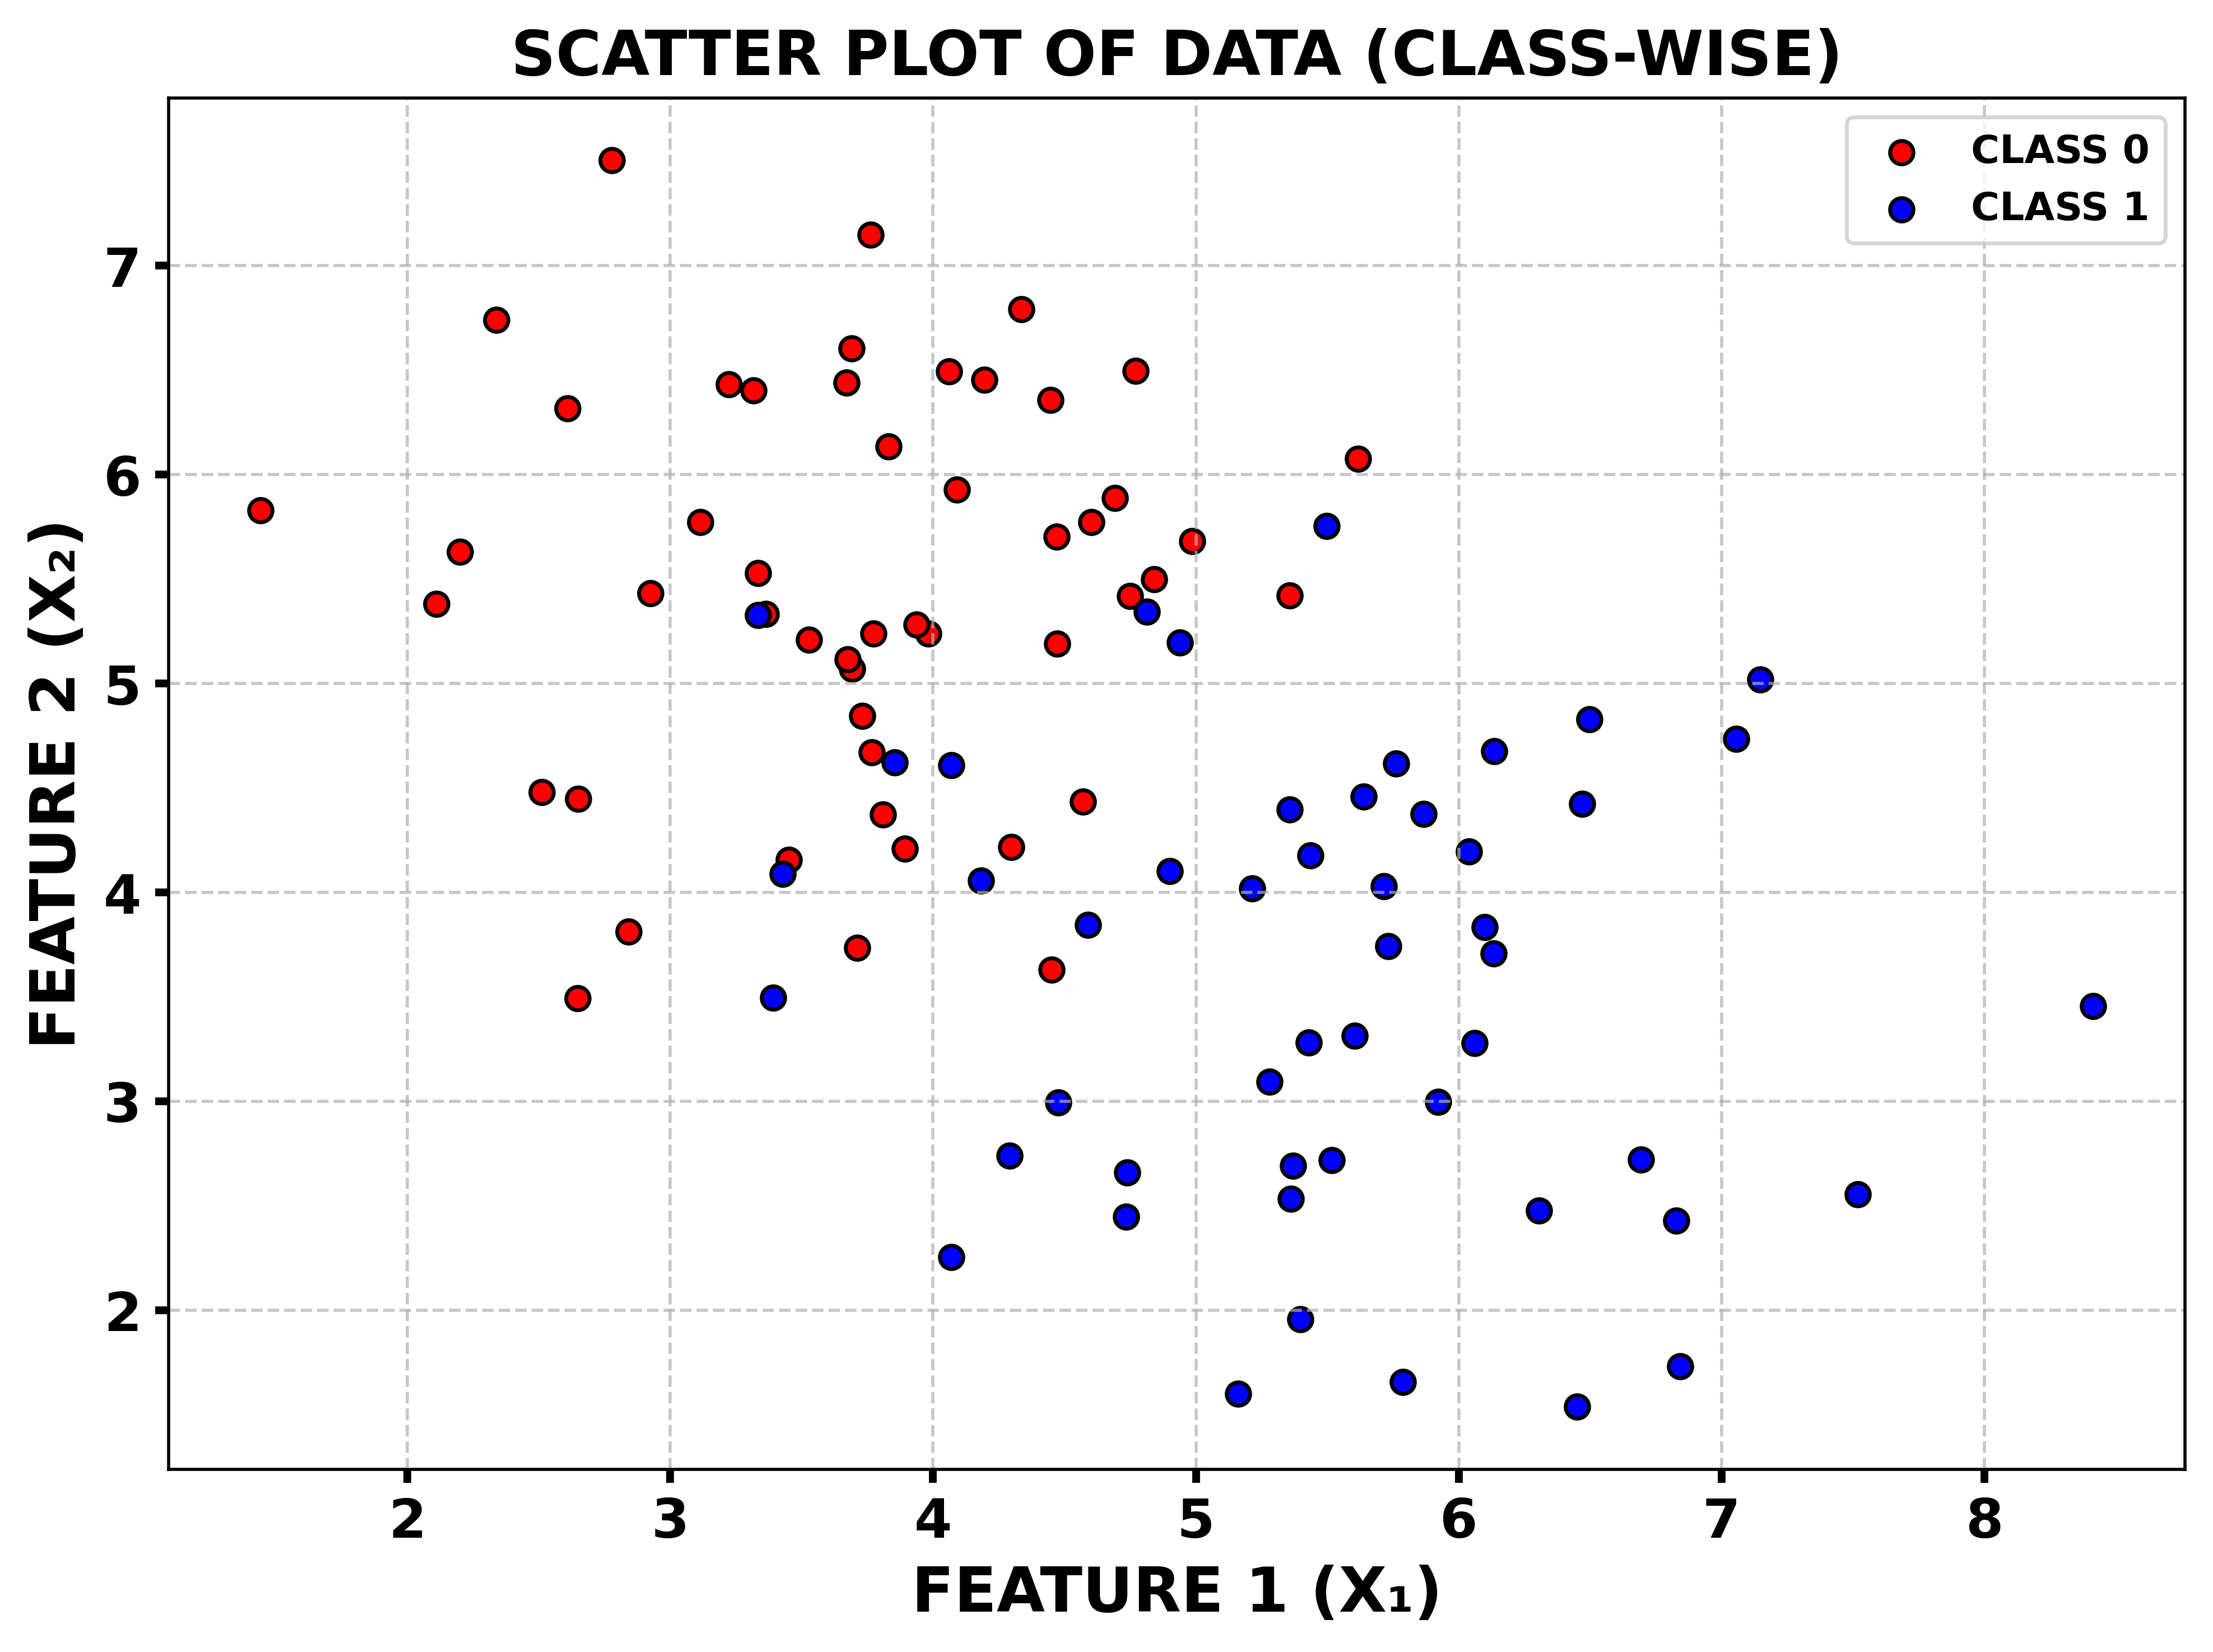

In [ ]:
plt.figure(figsize = (8, 6), dpi = 500)

# PLOT CLASS 0 POINTS
plt.scatter(X_data[y_flat == 0, 0], X_data[y_flat == 0, 1], color = 'red', edgecolors = 'black', label = 'CLASS 0')

# PLOT CLASS 1 POINTS
plt.scatter(X_data[y_flat == 1, 0], X_data[y_flat == 1, 1], color = 'blue', edgecolors = 'black', label = 'CLASS 1')

plt.title('SCATTER PLOT OF DATA (CLASS-WISE)', fontsize = 16, fontweight = 'bold')
plt.xlabel("FEATURE 1 (X₁)", fontsize=16, fontweight='bold')
plt.ylabel("FEATURE 2 (X₂)", fontsize=16, fontweight='bold')

plt.tick_params(axis = 'both', which = 'major', labelsize = 14, width = 2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
    
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'upper right', fontsize=16, frameon=True, prop={'weight' : 'bold'})
plt.tight_layout()
plt.show()